***

# 🚑 911 Calls Capstone Project


✔️ All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our data analysis skills!

✔️ First some basic questions:

> 1. From where the calls come most?
> 2. Which are top townships for calls?
> 3. How many unique title?
> 4. What is the reason for most calls?

✔️ Feature informations:
> * `lat` : String variable, Latitude
> * `lng`: String variable, Longitude
> * `desc`: String variable, Description of the Emergency Call
> * `zip`: String variable, Zipcode
> * `title`: String variable, Title
> * `timeStamp`: String variable, YYYY-MM-DD HH:MM:SS
> * `twp`: String variable, Township
> * `addr`: String variable, Address
> * `e`: String variable, Dummy variable (always 1)

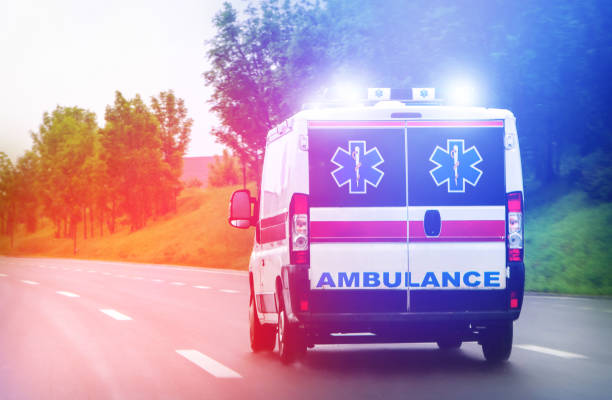

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# 📂 Get the Data

In [ ]:
data = pd.read_csv("/kaggle/input/montcoalert/911.csv")
column = ['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp'
          , 'township', 'address', 'e']
data.columns = column
data.head()

In [ ]:
data.drop('e', axis=1, inplace=True)

# 🔍 Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [ ]:
data.info()

### 📌 Note:
> - Data have float, integer, and object values. `timestamp` is a date.
> - Some variable columns have null/missing values.

> - The `describe()` function in pandas is very handy in getting various summary statistics.This function returns the `count`, `mean`, `standard deviation`, `minimum` and `maximum` values and the quantiles of the data.

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

### 📌 Note:
> - We can compare the `mean` with the `median (50%)`.
> - We can compare the `75%` with the `100%` to detect outliers.

In [ ]:
data.isna().sum()

---

> - `zip`: has 52129 missing values (Zipcode)
> - `twp`: has 159 missing values (Township)

# 📝 "desc" : Description of the Emergency Call

In [ ]:
data['station_num'] = data.description.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
data.head()

In [ ]:
data.station_num.str.replace(':', '').value_counts()[:10]

In [ ]:
df = data.station_num.str.replace(':', '').value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")

plt.barh(x, y)

### 📌 Note:
> - The `description` feature have a lot of important information (township, address, timestamp ...) but the station number is missing for the most of the emergency calls.
> - Most of the calls come from stations `308A`, `329`, `313`, `381`, and `317`

# 📍 "Zipcode"

In [ ]:
print(data.zipcode.nunique())
print(data.zipcode.unique())

In [ ]:
data.zipcode.value_counts()

❓ **What are the top 5 zipcodes for 911 calls?**

In [ ]:
data.zipcode.value_counts().head()

❓ **What are the top 5 townships (twp) for 911 calls?**

In [ ]:
data.township.value_counts().head()

❓ **Take a look at the 'title' column, how many unique title codes are there?**

In [ ]:
data.title.head()

In [ ]:
data.title.nunique()

#  Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are `EMS`, `Fire`, and `Traffic`. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [ ]:
# data['Reason_category'] = data.title.apply(lambda title: title.split(': ')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [ ]:
data['Reason_category'] = data.title.str.split(':', expand=True)[0]
data['Reason'] = data.title.str.split(':', expand=True)[1].str.replace(' -', '')

In [ ]:
print(data.Reason.value_counts())
print(data.Reason.nunique())

In [ ]:
print(data.Reason_category.value_counts())
print(data.Reason_category.nunique())

In [ ]:
df = data.Reason.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.barh(x, y)

**Now use seaborn to create a countplot of 911 calls by Reason.**

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Reason_category, data=data)

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [ ]:
data.head()

In [ ]:
data['timestamp'] = pd.to_datetime(data.timestamp)

In [ ]:
data.timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**
- `time = df['timeStamp'].iloc[0]`
- `time.hour`

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [ ]:
data['Hour'] = data.timestamp.dt.hour
data['Month'] = data.timestamp.dt.month
data['DayOfWeek'] = data.timestamp.dt.weekday

In [ ]:
data.head()

The `description` feature isn't usefull anymore

In [ ]:
data.drop('description', axis=1, inplace=True)

In [ ]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['DayOfWeek'] = data.DayOfWeek.map(dmap)
data.DayOfWeek.value_counts()

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.DayOfWeek, data=data, hue='Reason_category')

**Now do the same for Month:**

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Month, data=data, hue='Reason_category')

**Did you notice something strange about the Plot?**

_____

You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [ ]:
byMonth = data.groupby('Month').count()
byMonth

**Now create a simple plot off of the dataframe indicating the count of calls per month.**

In [ ]:
byMonth.township.plot(figsize=(10, 8))

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

In [ ]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='Month',y='township',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [ ]:
data['Date'] = data.timestamp.dt.date
data.Date

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [ ]:
byDate = data.groupby("Date").count()
byDate.head()

In [ ]:
byDate.township.plot(figsize=(10, 8))

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [ ]:
plt.figure(figsize=(15, 15))

for i, reason in enumerate(data.Reason_category.unique(), 1):
    plt.subplot(2, 2, i)
    data[data['Reason_category']==reason].groupby('Date').count()['township'].plot()
    plt.title(reason)
    plt.tight_layout()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [ ]:
dayHour = data.groupby(by=['DayOfWeek','Hour']).count()['Reason_category'].unstack()
dayHour.head()

**Now create a HeatMap using this new DataFrame.**

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayHour)

**Now create a clustermap using this DataFrame.**

In [ ]:
plt.figure(figsize=(12, 8))
sns.clustermap(dayHour)

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [ ]:
dayMonth = data.groupby(by=['DayOfWeek','Month']).count()['Reason_category'].unstack()
dayMonth.head()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayMonth)

In [ ]:
plt.figure(figsize=(12, 8))
sns.clustermap(dayMonth)

## Longitude and Latitude

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(data.longitude, data.latitude, c=data.Month, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Month')

In [ ]:
data.head()